# This is a ML model used to determine whther a person will be able to repay his/her loan completely.

# Firstly we will import the libraries required

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

# Now we will load the dataset

In [3]:
loans=pd.read_csv('loan_data.csv')

# Now let's check out what the data is.

In [4]:
loans

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [5]:
loans.info
# it is used to check out some information about the columns

<bound method DataFrame.info of       credit.policy             purpose  int.rate  installment  \
0                 1  debt_consolidation    0.1189       829.10   
1                 1         credit_card    0.1071       228.22   
2                 1  debt_consolidation    0.1357       366.86   
3                 1  debt_consolidation    0.1008       162.34   
4                 1         credit_card    0.1426       102.92   
...             ...                 ...       ...          ...   
9573              0           all_other    0.1461       344.76   
9574              0           all_other    0.1253       257.70   
9575              0  debt_consolidation    0.1071        97.81   
9576              0    home_improvement    0.1600       351.58   
9577              0  debt_consolidation    0.1392       853.43   

      log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
0          11.350407  19.48   737        5639.958333      28854        52.1   
1          11.082

In [6]:
l1=loans.columns
l1
# This method return a list of columns.

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [7]:
loans.head()
# this method is used to get the overview of our dataset.

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [8]:
loans.describe()
# This method will give some statistical information about numerical columns

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# Now let's explore the data and visualise it.

In [9]:
# we will use the visualisation libraries..
# mainly matplotlib and seaborn module to explore our data

<Figure size 720x432 with 0 Axes>

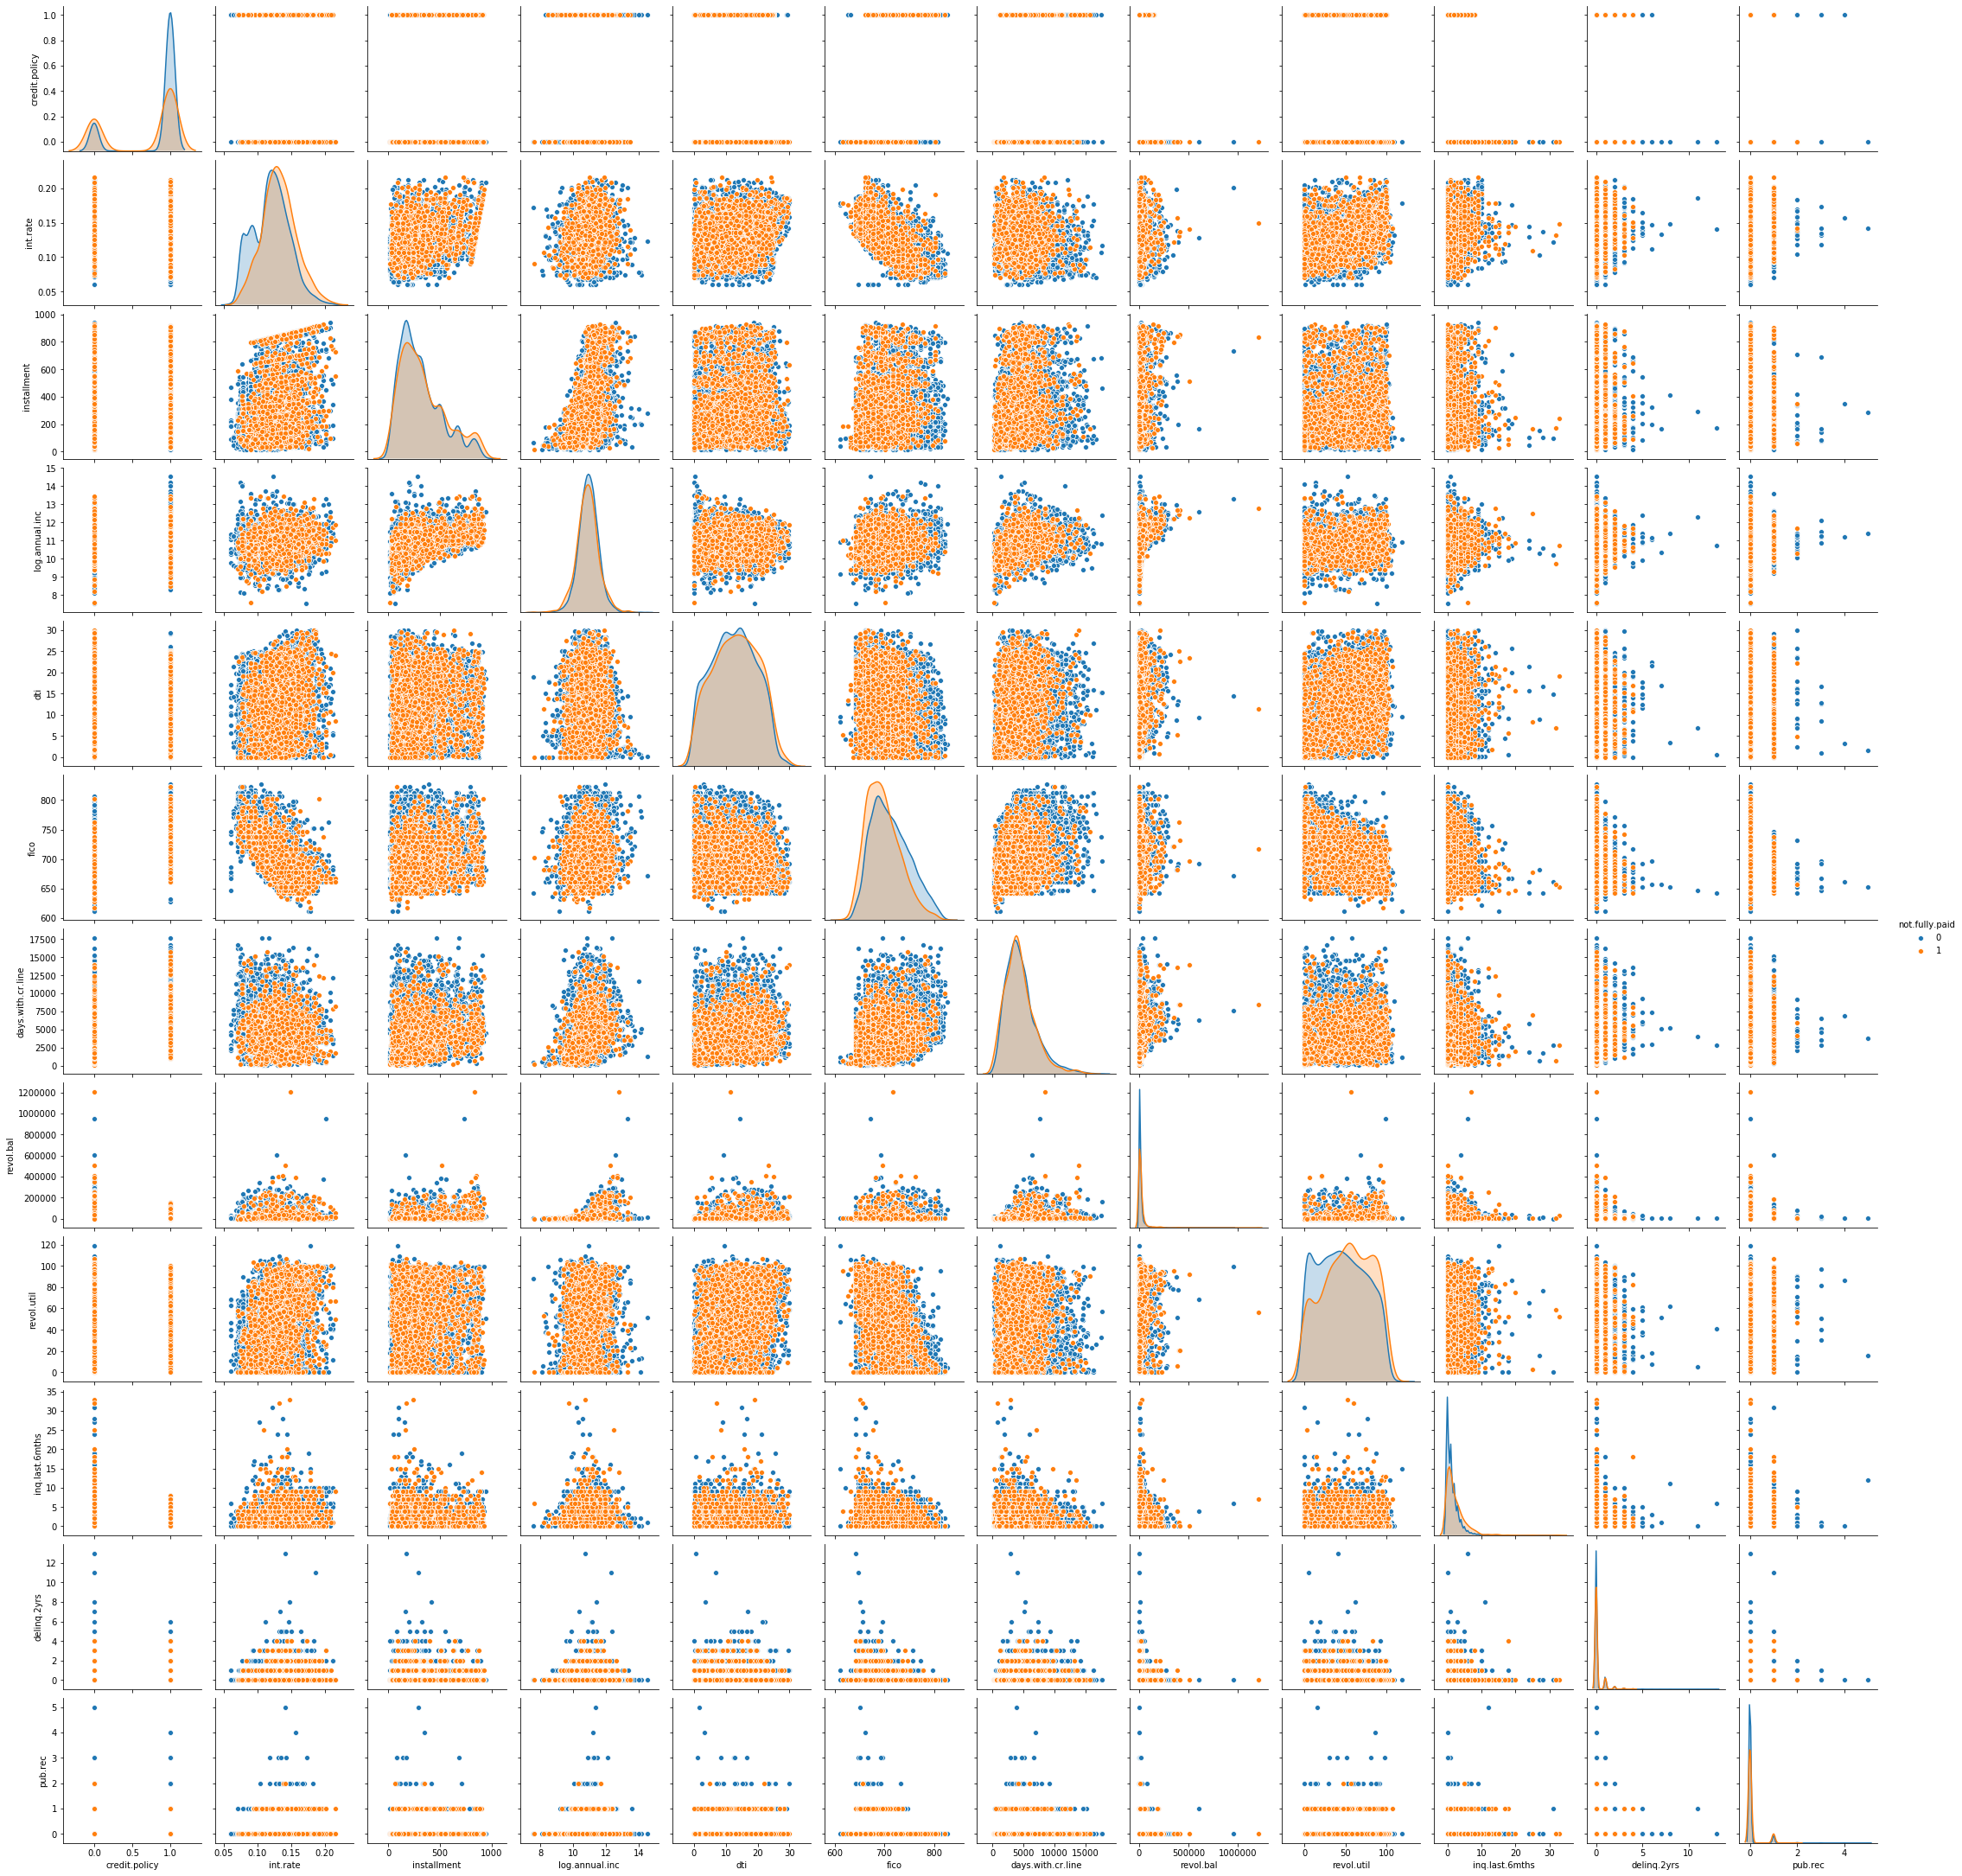

In [10]:
plt.figure(figsize=(10,6))
sns.pairplot(loans,hue='not.fully.paid')
# This method in seaborn gives the relation of pairwise distinct variables.

Text(0.5, 0, 'FICO')

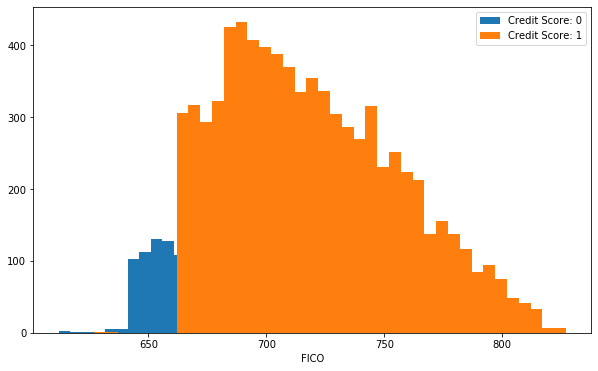

In [11]:
# Now we will plot a histogram of the two Fico distributions to compare and see the distribution
plt.figure(figsize=(10,6))
# histogram corresponding to credit score 0
plt.hist(loans[loans['credit.policy']==0]['fico'],label='Credit Score: 0',bins=40)
plt.hist(loans[loans['credit.policy']==1]['fico'],label='Credit Score: 1',bins=40)
plt.legend()
# legend method is used to pint the labels.
plt.xlabel('FICO')

In [12]:
# From this analyisis we can conclude that people who have low fico score tend to have credit score 0(based on this trend).

In [13]:
# Now let's see the dependency of not.fully.paid on fico score.

Text(0.5, 0, 'FICO')

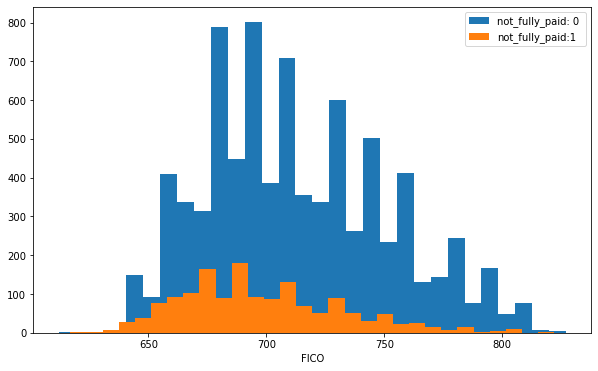

In [14]:
plt.figure(figsize=(10,6))
plt.hist(loans[loans['not.fully.paid']==0]['fico'],label='not_fully_paid: 0 ' , bins=30)
plt.hist(loans[loans['not.fully.paid']==1]['fico'],label='not_fully_paid:1',bins=30)
plt.legend()
plt.xlabel('FICO')

In [15]:
# There is no point of analysis of fico score on the basis of whether person has fully paid the loan or not

In [16]:
# Now we will create a countplot using seaborn to show the counts of loans by purpose, with the color hue defined by not.fully.paid
# to check what is the major purpose for which people take loans.

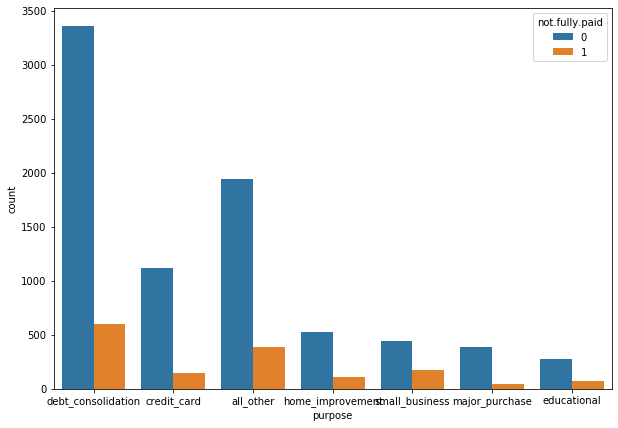

In [17]:
plt.figure(figsize=(10,7))
sns.countplot(x=loans['purpose'],hue=loans['not.fully.paid'])

In [18]:
# Check out the trend between fico score and interest rate and fico score

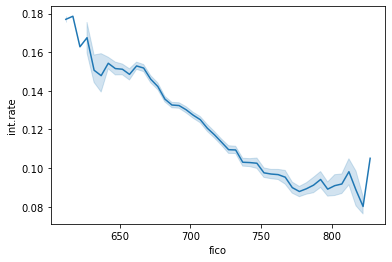

In [19]:
sns.lineplot(x="fico", y="int.rate",data=loans)

In [20]:
# We can infer from this lineplot that lesser the fico score more is the interest rate.

In [21]:
# Now we want to check out for the difference in on the basis of credit scores when paid fully or not seperately.

<Figure size 864x504 with 0 Axes>

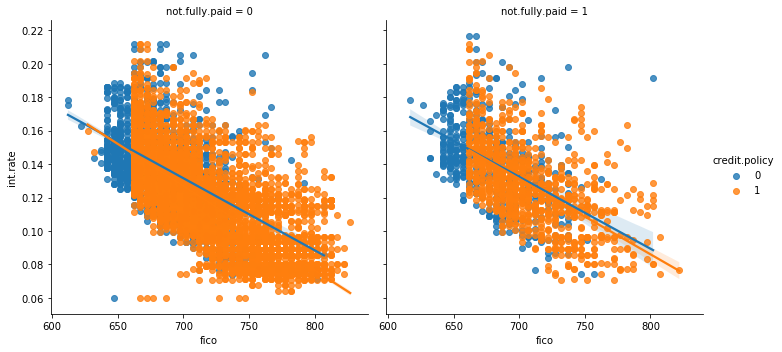

In [22]:
plt.figure(figsize=(12,7))
sns.lmplot(data=loans,x='fico',y='int.rate',hue='credit.policy',col='not.fully.paid')

In [23]:
# plot is almost similar.

In [24]:
# Now we are confident enough with data analysis.
# Let's do some data cleaning.

# Data Cleaning

In [25]:
# It is advent from the data that the 'purpose' column of this data set in in string.
# So firstly we just need to create some dummy values corresponding to that column.
# Let's do that!

In [26]:
f1=pd.get_dummies(loans['purpose'],drop_first=True)
f1

,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,0,1,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
9573,0,0,0,0,0,0
9574,0,0,0,0,0,0
9575,0,1,0,0,0,0
9576,0,0,0,1,0,0


In [27]:
final_data=pd.concat([loans.drop('purpose',axis=1),f1],axis=1)

In [28]:
final_data

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


In [29]:
# So now we are done with our data cleaning part.

In [30]:
# Let's move on to Model training part using decision Tree and Random Forest.

# Model Training and Testing

In [31]:
# Now we will split the given data into training set and testing set using sklearn library.

In [32]:
X=final_data.drop('not.fully.paid',axis=1)
y=final_data['not.fully.paid']

In [33]:
# We have defined X as our input features(on the basis of which we will predict whether or not a person will be able to repay it's loan(y))


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [36]:
# Now that we have split our dataset into training and testing set.
# Let's use Decision Tree model and Random Forest Classifier to predict the accuracy of our aim.

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
dtree=DecisionTreeClassifier()
# We created an instance or object of dtree

In [39]:
# Now we will train our model

In [40]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

# Predictions and evaluations

In [41]:
pred=dtree.predict(X_test)

In [42]:
from sklearn.metrics import classification_report,confusion_matrix

In [43]:
print(classification_report(y_test,pred)+'\n')
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.75      0.73      0.74      2874


[[1999  432]
 [ 341  102]]


#  Train using Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rfc=RandomForestClassifier(n_estimators=300)
# n_estimators stands for the number of decisions which will be used to train the model.

In [46]:
rfc.fit(X_train,y_train)


RandomForestClassifier(n_estimators=300)

In [47]:
pred1=rfc.predict(X_test)

In [48]:
print(classification_report(y_test,pred1)+'\n')
print(confusion_matrix(y_test,pred1))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.43      0.02      0.04       443

    accuracy                           0.84      2874
   macro avg       0.64      0.51      0.48      2874
weighted avg       0.78      0.84      0.78      2874


[[2419   12]
 [ 434    9]]


In [49]:
# It can be easily compared and we can colclude that for this dataset Random Forest Classifier worked better.

# THE END :)